In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math


chl_df = pd.read_excel("./data/chlorophyll readings report CAR-2025-500 (2025-09-29).xlsx", header=2)
cols = ["Bottle", "Depth (m)", "Chlorophyll-a (μg)", "Fluorescence from ctd"]
chl_subdf = chl_df.loc[:, cols].drop_duplicates().sort_values("Depth (m)")
chl_subdf = chl_subdf.groupby("Bottle").agg("mean").sort_values("Depth (m)")
chl_subdf = chl_subdf.rename(columns={"Depth (m)":"depth","Chlorophyll-a (μg)":"lab", "Fluorescence from ctd":"ctd"})
chl_subdf

,depth,lab,ctd
Bottle,,,
520328,1.0,1.259192,1.0153
520327,5.0,1.127713,1.2160
520275,5.0,1.204445,1.3346
520279,5.0,0.985455,1.0960
520284,5.0,1.113199,1.0348
...,...,...,...
520427,321.0,0.000000,0.0651
520090,326.0,0.000000,0.0514
520448,354.0,0.090717,0.0521


2.8116

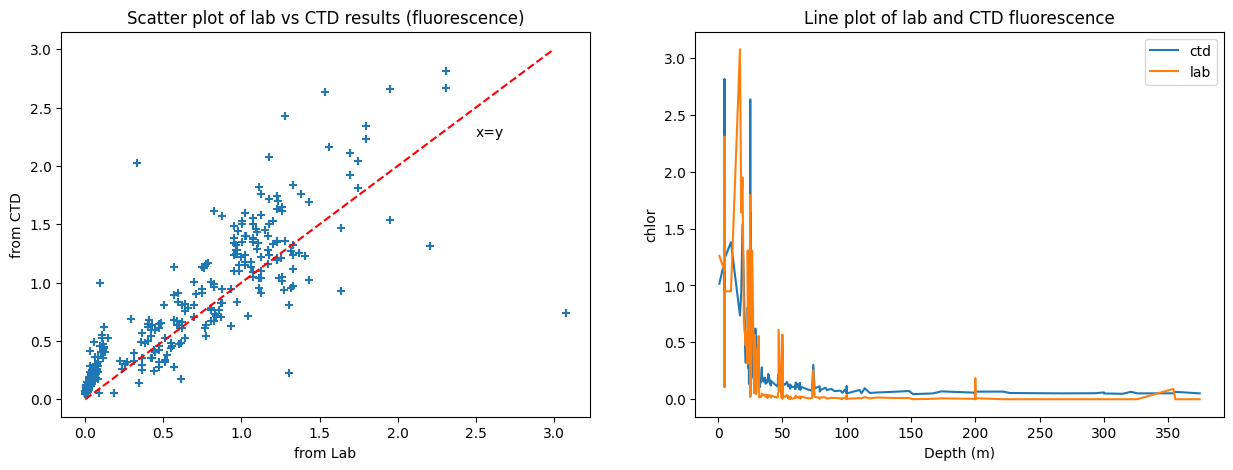

In [127]:
m = max(chl_subdf["ctd"].max(), chl_subdf["lab"].max())
x = y = np.arange(0,m,0.1)

fig, axs = plt.subplots(1,2, figsize=(15, 5))
ax0, ax1 = axs
ax0.scatter(data=chl_subdf, x="lab", y="ctd", marker="+")
ax0.plot(x,y, "--r")
ax0.text(2.5,2.25, "x=y")
ax0.set_xlabel('from Lab')
ax0.set_ylabel('from CTD')
ax0.set_title('Scatter plot of lab vs CTD results (fluorescence)')

ax1.plot(chl_subdf["depth"], chl_subdf["ctd"], label="ctd")
ax1.plot(chl_subdf["depth"], chl_subdf["lab"], label="lab")
ax1.set_xlabel('Depth (m)')
ax1.set_ylabel('chlor')
ax1.set_title('Line plot of lab and CTD fluorescence')
ax1.legend()
plt.show()


In [82]:


o2_df = pd.read_excel("./data/oxygen readings report CAR-2025-500 (2025-09-29).xlsx", header=2)
cols = ["Bottle", "Depth (m)", "Oxygen concentration (ml/L)", "Value from ctd"]
o2_subdf = o2_df.loc[:, cols].drop_duplicates().sort_values("Depth (m)")
o2_subdf = o2_subdf.groupby("Bottle").agg("mean").sort_values("Depth (m)").rename(columns={"Depth (m)":"depth","Oxygen concentration (ml/L)":"lab", "Value from ctd":"ctd"})
o2_subdf



,depth,lab,ctd
Bottle,,,
520328,1.0,6.0925,5.5644
520684,5.0,5.7040,5.4064
520260,5.0,5.4820,3.4811
520461,5.0,6.3560,6.1319
520256,5.0,5.3390,5.2958
...,...,...,...
520090,326.0,2.6930,2.5671
520449,354.0,7.4700,2.7774
520448,354.0,3.0425,2.7774


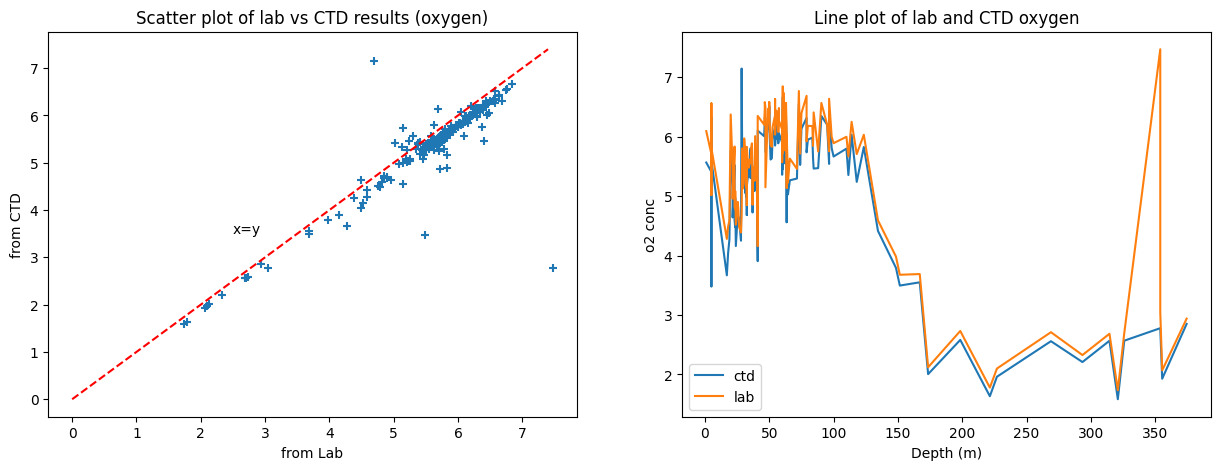

In [130]:
m = max(o2_subdf["ctd"].max(), o2_subdf["lab"].max())
x = y = np.arange(0,m,0.1)

fig, axs = plt.subplots(1,2, figsize=(15, 5))
ax0, ax1 = axs
ax0.scatter(data=o2_subdf, x="lab", y="ctd", marker="+")
ax0.plot(x,y, "--r")
ax0.text(2.5,3.5, "x=y")
ax0.set_xlabel('from Lab')
ax0.set_ylabel('from CTD')
ax0.set_title('Scatter plot of lab vs CTD results (oxygen)')

ax1.plot(o2_subdf["depth"], o2_subdf["ctd"], label="ctd")
ax1.plot(o2_subdf["depth"], o2_subdf["lab"], label="lab")
ax1.set_xlabel('Depth (m)')
ax1.set_ylabel('o2 conc')
ax1.set_title('Line plot of lab and CTD oxygen')
ax1.legend()
plt.show()
